In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

%matplotlib inline  

In [3]:
df_train = pd.read_csv('churn_prediction_data/train.csv')
df_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,551,15806307,Trevisano,720,Spain,Male,38,5,114051.97,2,0,1,107577.29,0
1,6897,15709621,Martin,682,France,Female,54,4,62397.41,1,1,0,113088.60,1
2,4588,15619340,Palmer,672,France,Female,31,5,119903.67,1,1,1,132925.17,0
3,291,15620746,Napolitani,592,Spain,Female,40,4,104257.86,1,1,0,110857.33,0
4,1673,15646372,Yao,753,Spain,Male,42,5,120387.73,1,0,1,126378.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,5345,15584532,Yu,568,France,Female,35,6,121079.60,2,1,1,124890.50,1
7996,5837,15606641,Liao,602,Germany,Female,45,7,145846.07,1,1,0,99276.02,0
7997,7335,15739692,Ferri,679,Spain,Female,43,5,132810.01,1,1,0,130780.85,1
7998,9552,15791373,Worsnop,715,France,Male,38,4,118729.45,1,0,0,95484.52,0


In [4]:
train_data = df_train.loc[:, 'CreditScore': 'EstimatedSalary']
train_label = df_train.Exited

In [5]:
lbl = preprocessing.LabelEncoder()
train_data['Geography'] = lbl.fit_transform(train_data['Geography'].astype(str))
train_data['Gender'] = lbl.fit_transform(train_data['Gender'].astype(str))
train_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,720,2,1,38,5,114051.97,2,0,1,107577.29
1,682,0,0,54,4,62397.41,1,1,0,113088.60
2,672,0,0,31,5,119903.67,1,1,1,132925.17
3,592,2,0,40,4,104257.86,1,1,0,110857.33
4,753,2,1,42,5,120387.73,1,0,1,126378.57
...,...,...,...,...,...,...,...,...,...,...
7995,568,0,0,35,6,121079.60,2,1,1,124890.50
7996,602,1,0,45,7,145846.07,1,1,0,99276.02
7997,679,2,0,43,5,132810.01,1,1,0,130780.85
7998,715,0,1,38,4,118729.45,1,0,0,95484.52


In [6]:
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, train_size = 6000, test_size = 2000, random_state = 48)
x_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
343,446,0,0,44,2,118236.53,1,1,1,130726.12
6396,618,0,1,55,3,62397.41,1,1,1,102636.06
5602,671,2,1,45,6,62397.41,2,1,0,134328.43
7447,652,1,0,34,3,120245.47,2,0,0,90919.13
5555,690,0,0,34,3,101490.37,1,0,1,135283.89
...,...,...,...,...,...,...,...,...,...,...
2395,646,0,0,39,3,94109.43,1,1,1,74785.12
5572,590,0,0,34,2,135921.97,1,1,0,102170.13
1361,662,2,0,42,6,62397.41,2,1,1,124865.98
2611,641,2,0,37,6,62397.41,2,1,0,116342.94


# Random Forest

#### 基本模型

In [35]:
clf = RandomForestClassifier(random_state = 6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [47]:
acc_o = accuracy_score(y_test, y_pred).round(4)
precision_o = precision_score(y_test, y_pred).round(4)
fScore_o = f1_score(y_test, y_pred).round(4)
score_o = ( 0.3*acc_o+0.3*precision_o+0.4*fScore_o ).round(4)

print('Accuracy =', acc_o)
print('Precision =', precision_o)
print('F Score =', fScore_o)
print('Final score =', score_o)

Accuracy = 0.8675
Precision = 0.7553
F Score = 0.5746
Final score = 0.7167


## >>> step1 

#### 函數：找出加權分數最高的參數設定值

In [48]:
def best(x, acc_list, prec_list, f_list) :
    maximum = 0
    for i in range(len(acc_list)) :
        score = 0.3*acc_list[i]+0.3*prec_list[i]+0.4*f_list[i]
        if score > maximum :
            maximum = score
            n = x[i]
        
    return (maximum.round(4), n) #maximum = 最高分加權分數；n = 該最高分模型用的參數值

- 備註：以下跑各參數的程式碼皆相同，只有 #設定 該行手動改變參數名
#### n_estimators  |  結論： 165

n_estimators = 60 , n_estimators = 80 , n_estimators = 100 , n_estimators = 120 , n_estimators = 140 , n_estimators = 160 , n_estimators = 180 , n_estimators = 200 , n_estimators = 220 , n_estimators = 240 , n_estimators = 260 , n_estimators = 280 , end of procedure


(0.7288, 170)

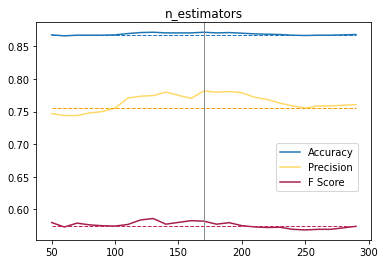

In [51]:
x = range(50, 300, 10)  #設定 : 嘗試的參數值域
acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, n_estimators = i)  #設定 : 跑模型
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%20 == 0 :
        print('n_estimators =', i, end=' , ') #設定 : 參數名字

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('n_estimators')  #設定 : 圖名-參數名字
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.7, 0.2))

plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/n_estimators (50, 300, 10).png') #設定 : 存圖檔名

best_one

n_estimators = 120 , n_estimators = 140 , n_estimators = 160 , end of procedure


(0.7328, 165)

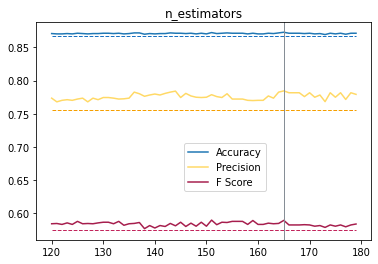

In [53]:
x = range(120, 180)

只留執行結果

#### criterion |  結論：沒差

end of procedure


(0.7167, 'gini')

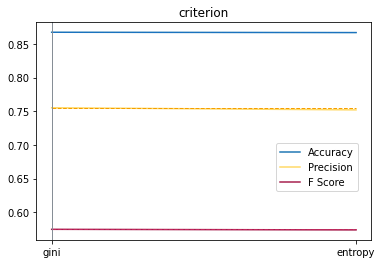

In [72]:
x = ['gini', 'entropy']
acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, criterion = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('criterion')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.7, 0.2))
plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/criterion.png')

best_one

#### n_jobs |  結論：每次都不一樣...

n_jobs = 1 , n_jobs = 6 , n_jobs = 11 , n_jobs = 16 , n_jobs = 21 , n_jobs = 26 , n_jobs = 31 , n_jobs = 36 , n_jobs = 41 , n_jobs = 46 , end of procedure


(0.7294, 44)

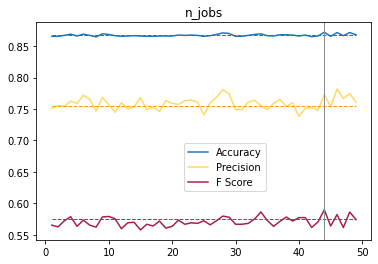

In [58]:
x = range(1,50)
acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(n_jobs = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%5 == 1 :
        print('n_jobs =', i, end=' , ') 

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('n_jobs')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.7, 0.2))
plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/n_jobs (1,50)4.png')

best_one

#### max_depth  |  結論：12

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth = 5 , max_depth = 10 , max_depth = 15 , max_depth = 20 , max_depth = 25 , max_depth = 30 , max_depth = 35 , end of procedure


(0.7383, 12)

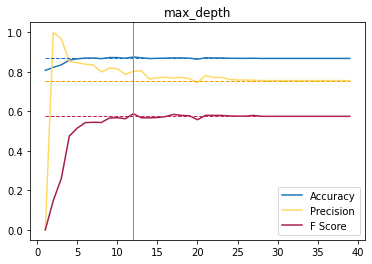

In [107]:
x = range(1, 40)
acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, max_depth = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%5 == 0 :
        print('max_depth =', i, end=' , ') 

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('max_depth')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], loc = 'lower right')

plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/max_depth (1, 40).png')

best_one

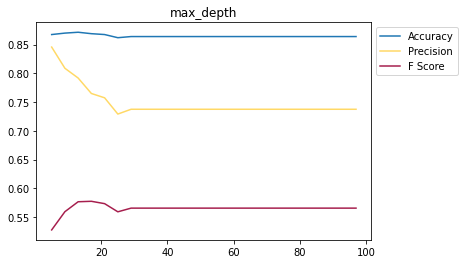

In [20]:
長線走勢圖

#### min_samples_split | 結論：17

min_samples_split = 5 , min_samples_split = 20 , min_samples_split = 35 , min_samples_split = 50 , min_samples_split = 65 , min_samples_split = 80 , min_samples_split = 95 , min_samples_split = 110 , end of procedure


(0.7426, 17)

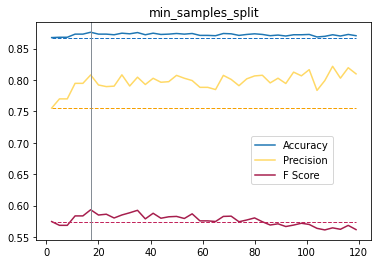

In [111]:
x = range(2, 120, 3)

acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, min_samples_split = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%5 == 0 :
        print('min_samples_split =', i, end=' , ') 

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('min_samples_split')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.9, 0.5))

plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/min_samples_split (2, 120, 3).png')

best_one

#### min_samples_leaf | 結論：12

min_samples_leaf = 1 , min_samples_leaf = 11 , min_samples_leaf = 21 , min_samples_leaf = 31 , min_samples_leaf = 41 , min_samples_leaf = 51 , min_samples_leaf = 61 , min_samples_leaf = 71 , min_samples_leaf = 81 , min_samples_leaf = 91 , end of procedure


(0.7348, 6)

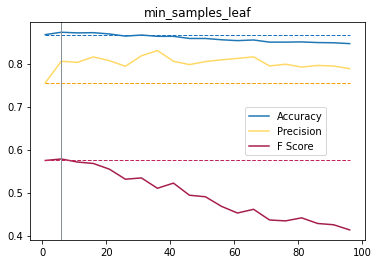

In [62]:
x = range(1, 100, 5)

acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, min_samples_leaf = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%10 == 1 :
        print('min_samples_leaf =', i, end=' , ') 

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('min_samples_leaf')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.9, 0.5))

plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/min_samples_leaf (1, 100, 5).png')

best_one

min_samples_leaf = 1 , min_samples_leaf = 11 , end of procedure


(0.7368, 12)

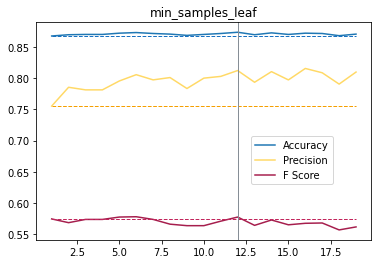

In [64]:
x = range(1, 20)

只留結果

#### max_features | 結論：2

max_features = 1 , max_features = 4 , max_features = 7 , end of procedure


(0.7271, 2)

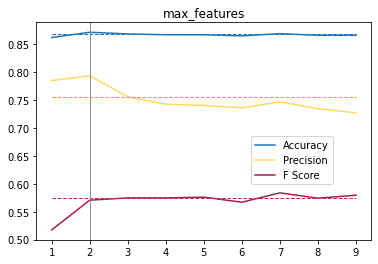

In [65]:
x = range(1, 10)

acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, max_features = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%3 == 1 :
        print('max_features =', i, end=' , ') 

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('max_features')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.9, 0.5))

plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/max_features (1, 10).png')

best_one

#### warm_start | 不討論ㄌ

#### class_weight | 結論：{0:6, 1:1}

end of procedure


(0.7215, 7)

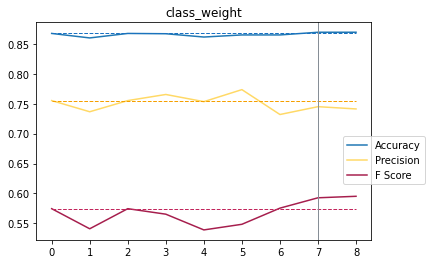

In [67]:
x = [None, "balanced", {0:1, 1:1}, {0:1, 1:3}, {0:1, 1:6},{0:1, 1:10}, {0:3, 1:1}, {0:6, 1:1}, {0:10, 1:1} ]

acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, class_weight = i)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')


x = [0,1,2,3,4,5,6,7,8]
plt.plot(list(x), acc_list)
plt.plot(list(x), prec_list, color = '#FFD966')
plt.plot(list(x), f_list, color = '#A61E4D')
plt.title('class_weight')
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.9, 0.5))


plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/class_weight2.png')

best_one

#### max_samples | 結論：628

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_samples = 1 , max_samples = 101 , max_samples = 201 , max_samples = 301 , max_samples = 401 , max_samples = 501 , max_samples = 601 , max_samples = 701 , max_samples = 801 , max_samples = 901 , end of procedure


(0.7388, 961)

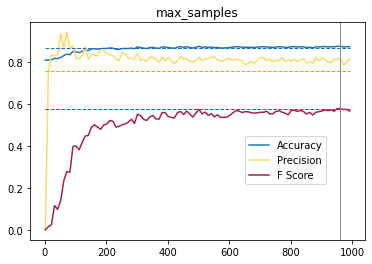

In [68]:
x = range(1, 1000, 10)


acc_list = list()
prec_list = list()
f_list = list()
for i in x :
    clf = RandomForestClassifier(random_state = 6, max_samples = i)  
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    fScore = f1_score(y_test, y_pred).round(4)
    
    if i%100 == 1 :
        print('max_samples =', i, end=' , ') 

    acc_list.append(acc)
    prec_list.append(precision)
    f_list.append(fScore)
    
print('end of procedure')

plt.plot( list(x), acc_list)
plt.plot( list(x), prec_list, color = '#FFD966')
plt.plot( list(x), f_list, color = '#A61E4D')
plt.title('max_samples')  
plt.legend(labels = ['Accuracy', 'Precision', 'F Score'], bbox_to_anchor=(0.9, 0.5))

plt.plot(list(x), acc_o.repeat(len(x)), color = '#1971C2', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), precision_o.repeat(len(x)), color = '#F59F00', linewidth = 1, linestyle = 'dashed')
plt.plot(list(x), fScore_o.repeat(len(x)), color = '#C2255C', linewidth = 1, linestyle = 'dashed')

best_one = best(x, acc_list, prec_list, f_list)
plt.axvline(x=best_one[1], ymin=0, ymax=1, color = '#868E96', linewidth = 1)

plt.savefig('figure3/max_samples (1, 1000, 10).png')

best_one

max_samples = 600 , max_samples = 700 , max_samples = 800 , max_samples = 900 , end of procedure


(0.7413, 628)

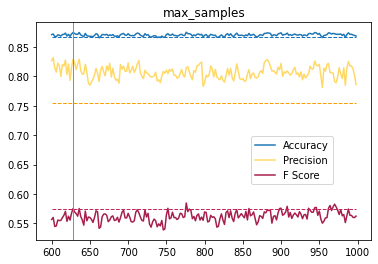

In [69]:
x = range(600, 1000, 2)

只留結果

### result of step1

In [82]:
parameter = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features', 'class_weight', 'max_samples']
value = [165, 12, 17, 12, 2, {0:6, 1:1}, 628]
score_list = [0.7328, 0.7383, 0.742, 0.7368, 0.7271, 0.7215, 0.7413]

df_parameter = pd.DataFrame({'parameter' : parameter, 'value' : value, 'model score' : score_list})
df_parameter['induced'] = df_parameter['model score'] - score_o

df_parameter

,parameter,value,model score,induced
0,n_estimators,165,0.7328,0.0161
1,max_depth,12,0.7383,0.0216
2,min_samples_split,17,0.7420,0.0253
3,min_samples_leaf,12,0.7368,0.0201
4,max_features,2,0.7271,0.0104
5,class_weight,"{0: 6, 1: 1}",0.7215,0.0048
6,max_samples,628,0.7413,0.0246


## >>> step2

##### 0 = 基本模型 

In [120]:
## pd.DF 存結果
pd.set_option('max_colwidth', 500)

log = pd.DataFrame({'model' : ('base', 1), 'acc' : (acc_o, 1), 'precision' : (precision_o, 1), 'f_score' : (fScore_o, 1), 'final_score' : (score_o, 1)})

log

,model,acc,precision,f_score,final_score
0,base,0.8675,0.7553,0.5746,0.7167
1,1,1.0000,1.0000,1.0000,1.0000


##### 使用複數參數之模型測試及結果儲存

In [115]:
#測試區

clf = RandomForestClassifier(random_state = 6, min_samples_split = 17)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

acc = accuracy_score(y_test, y_pred).round(4)
precision = precision_score(y_test, y_pred).round(4)
fScore = f1_score(y_test, y_pred).round(4)
score = ( 0.3*acc+0.3*precision+0.4*fScore ).round(4)

i =16
log.loc[i] = (str(clf), acc, precision, fScore, score)
    
log

# 5是 all in

,model,acc,precision,f_score,final_score
0,base,0.8675,0.755274,0.5746,0.716672
1,"RandomForestClassifier(max_depth=12, n_estimators=165, random_state=6)",0.8735,0.806500,0.5804,0.736200
2,"RandomForestClassifier(max_depth=12, min_samples_split=17, n_estimators=165,\n random_state=6)",0.8745,0.802700,0.5878,0.738300
3,"RandomForestClassifier(max_depth=12, min_samples_leaf=12, min_samples_split=17,\n n_estimators=165, random_state=6)",0.8705,0.792600,0.5705,0.727100
5,"RandomForestClassifier(max_depth=12, max_features=2, max_samples=628,\n min_samples_leaf=12, min_samples_split=17,\n n_estimators=165, random_state=6)",0.8395,0.842100,0.3326,0.637500
4,"RandomForestClassifier(max_depth=12, max_features=2, min_samples_leaf=12,\n min_samples_split=17, n_estimators=165, random_state=6)",0.8680,0.814400,0.5448,0.722600
6,"RandomForestClassifier(max_depth=12, min_samples_split=17, random_state=6)",0.8710,0.793600,0.5728,0.728500
7,"RandomForestClassifier(min_samples_split=17, n_estimators=165, random_state=6)",0.8745,0.805400,0.5865,0.738600
10,"RandomForestClassifier(max_samples=628, min_samples_split=17, random_state=6)",0.8680,0.811200,0.5464,0.722300
11,"RandomForestClassifier(max_features=2, min_samples_leaf=12, random_state=6)",0.8695,0.827200,0.5477,0.728100


## >>> Upload

In [116]:
df_test = pd.read_csv('churn_prediction_data/test.csv')
df_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,2209,15623595,Scott,726,France,Female,39,3,62397.41,1,0,0,106139.31
1,9924,15740283,Yegorova,661,France,Male,42,3,130339.64,1,1,0,125776.38
2,4617,15802368,Tan,545,France,Male,34,6,62397.41,2,1,1,78372.28
3,6077,15615322,Anayochukwu,731,Spain,Female,42,3,86717.08,1,1,0,136026.27
4,9240,15766374,Glover,533,France,Female,50,6,62397.41,1,1,1,135205.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7872,15617348,Taylor,628,France,Male,35,6,62397.41,2,1,1,96201.09
1996,4257,15642785,Tokareva,639,Germany,Male,41,5,98154.30,2,1,0,109531.64
1997,2273,15766575,Trevisan,548,France,Female,46,3,119078.34,2,1,1,116725.67
1998,315,15610271,Dickson,602,Spain,Female,44,7,62397.41,2,1,1,128135.95


In [117]:
test_data = df_test.loc[:, 'CreditScore': 'EstimatedSalary']
lbl = preprocessing.LabelEncoder()
test_data['Geography'] = lbl.fit_transform(test_data['Geography'].astype(str))
test_data['Gender'] = lbl.fit_transform(test_data['Gender'].astype(str))
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,726,0,0,39,3,62397.41,1,0,0,106139.31
1,661,0,1,42,3,130339.64,1,1,0,125776.38
2,545,0,1,34,6,62397.41,2,1,1,78372.28
3,731,2,0,42,3,86717.08,1,1,0,136026.27
4,533,0,0,50,6,62397.41,1,1,1,135205.58
...,...,...,...,...,...,...,...,...,...,...
1995,628,0,1,35,6,62397.41,2,1,1,96201.09
1996,639,1,1,41,5,98154.30,2,1,0,109531.64
1997,548,0,0,46,3,119078.34,2,1,1,116725.67
1998,602,2,0,44,7,62397.41,2,1,1,128135.95


In [118]:
clf = RandomForestClassifier(random_state = 0, min_samples_split = 17)
clf.fit(train_data, train_label)

test_pred = clf.predict(test_data)
upload_data = pd.DataFrame({'RowNumber': df_test.RowNumber, 'Exited':test_pred})
upload_data

,RowNumber,Exited
0,2209,0
1,9924,0
2,4617,0
3,6077,0
4,9240,0
...,...,...
1995,7872,0
1996,4257,0
1997,2273,0
1998,315,0


In [119]:
upload_data.to_csv('upload/RandomForest_final.csv')